## K-Means Clustering with Python

K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this kernel, I implement K-Means clustering to find intrinsic groups within the dataset that display the same status_type behaviour. The status_type behaviour variable consists of posts of a different nature (video, photos, statuses and links).

So, let's get started.

## 1. Introduction to K-Means Clustering 

Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

K-Means clustering is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

K-Means clustering can be represented diagrammatically as follows:-

## 2. Applications of clustering

K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-

1. Image segmentation

2. Customer segmentation

3. Species clustering

4. Anomaly detection

5. Clustering languages

## 3. K-Means Clustering intuition

K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.

Centroid - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-

# 3.1 Data assignment step

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.

# 3.2 Centroid update step

In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.

The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

The K-Means intuition can be represented with the help of following diagram:-

## 4. Choosing the value of K

The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the elbow method which is described below.

## 5. The elbow method

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K. The below diagram shows how the elbow method works:-

# The elbow method

We can see that if K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

## 6. Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/User/Desktop/KT_2022/Clustering'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/User/Desktop/KT_2022/Clustering\clustering.ipynb
C:/Users/User/Desktop/KT_2022/Clustering\Live.csv


## 7. Import dataset

In [2]:
data = 'C:/Users/User/Desktop/KT_2022/Clustering/Live.csv'

df = pd.read_csv(data)

## 8. Exploratory data analysis

Check shape of the dataset

In [3]:
df.shape

(7050, 16)

We can see that there are 7050 instances and 16 attributes in the dataset. In the dataset description, it is given that there are 7051 instances and 12 attributes in the dataset.

So, we can infer that the first instance is the row header and there are 4 extra attributes in the dataset. Next, we should take a look at the dataset to gain more insight about it.

Preview the dataset

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


View summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Check for missing values in dataset

In [6]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

We can see that there are 4 redundant columns in the dataset. We should drop them before proceeding further.

Drop redundant columns


In [7]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

Again view summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Now, we can see that redundant columns have been removed from the dataset.

We can see that, there are 3 character variables (data type = object) and remaining 9 numerical variables (data type = int64).

There are 3 categorical variables in the dataset. I will explore them one by one.

In [9]:
# view the labels in the variable

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [10]:
# view how many different types of variables are there

len(df['status_id'].unique())

6997

We can see that there are 6997 unique labels in the status_id variable. The total number of instances in the dataset is 7050. So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it.

Explore status_published variable

In [11]:
# view the labels in the variable

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [12]:
# view how many different types of variables are there

len(df['status_published'].unique())

6913

Again, we can see that there are 6913 unique labels in the status_published variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it also.

Explore status_type variable

In [13]:
# view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [14]:
# view how many different types of variables are there

len(df['status_type'].unique())

4

We can see that there are 4 categories of labels in the status_type variable.

Drop status_id and status_published variable from the dataset

In [15]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

View the summary of dataset again

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


Preview the dataset again¶

In [17]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


We can see that there is 1 non-numeric column status_type in the dataset. I will convert it into integer equivalents.

## 9. Declare feature vector and target variable 

In [18]:
X = df

y = df['status_type']

## 10. Convert categorical variable into integers

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

View the summary of X

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


Preview the dataset X

In [21]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## 11. Feature Scaling

In [22]:
cols = X.columns

In [23]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [24]:
X = pd.DataFrame(X, columns=[cols])

In [25]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## 12. K-Means model with two clusters

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit_predict(X)

c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([1, 0, 1, ..., 0, 0, 0])

## 13. K-Means model parameters study 

In [27]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

* The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

* The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

# Inertia
* Inertia is not a normalized metric.

* The lower values of inertia are better and zero is optimal.

* But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

* Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

* We can calculate model inertia as follows:-

In [28]:
kmeans.inertia_

237.75726404419558

* The lesser the model inertia, the better the model fit.

* We can see that the model has very high inertia. So, this is not a good model fit to the data.

## 14. Check quality of weak classification by the model

In [29]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [30]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


We have achieved a weak classification accuracy of 1% by our unsupervised model.

## 15. Use elbow method to find optimal number of clusters

c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\U

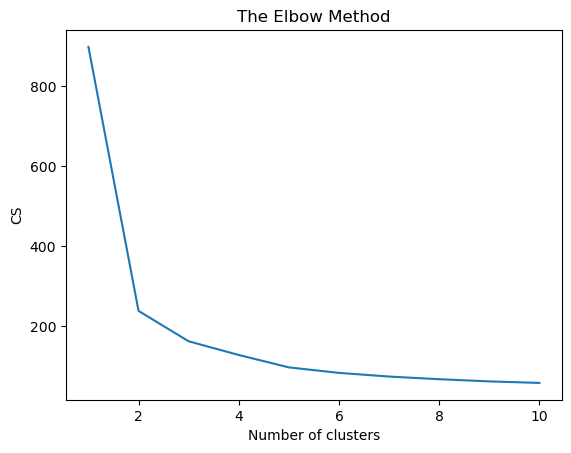

In [31]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit_predict(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

* By the above plot, we can see that there is a kink at k=2.

* Hence k=2 can be considered a good number of the cluster to cluster this data.

* But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

* I will write the required code with k=2 again for convinience.

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit_predict(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


So, our weak unsupervised classification model achieved a very weak classification accuracy of 1%.

I will check the model accuracy with different number of clusters.

## 16. K-Means model with different clusters 

K-Means model with 3 clusters

In [33]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit_predict(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


K-Means model with 4 clusters

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit_predict(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


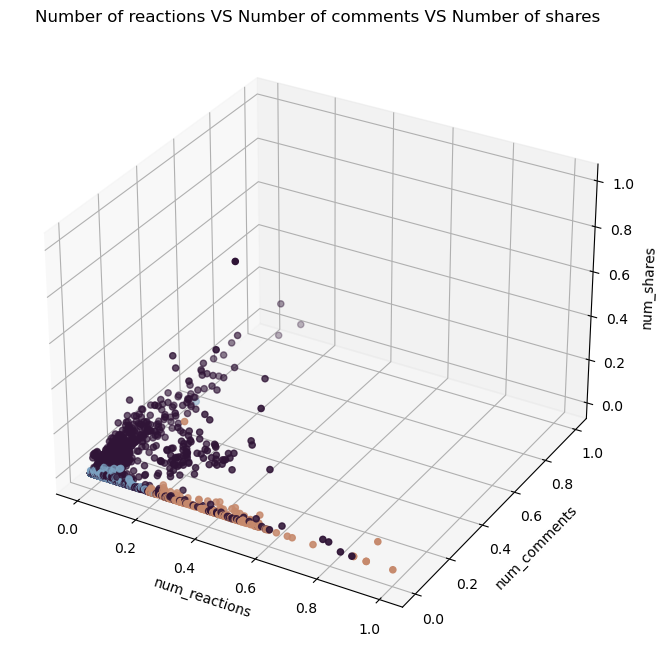

In [42]:
#A 3D Projection Of Data In The Reduced Dimension
x =X["num_reactions"]
y =X["num_comments"]
z =X["num_shares"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=labels, marker="o", cmap='twilight_shifted'  )
ax.set_title("Number of reactions VS Number of comments VS Number of shares")
ax.set_xlabel("num_reactions")
ax.set_ylabel("num_comments")
ax.set_zlabel("num_shares")
plt.show()

We have achieved a relatively high accuracy of 62% with k=4.

## 17. Results and conclusion

1. In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.

2. I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.

3. I have find that the model has very high inertia of 237.7572. So, this is not a good model fit to the data.

4. I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.

5. So, I have changed the value of k and find relatively higher classification accuracy of 62% with k=4.

6. Hence, we can conclude that k=4 being the optimal number of clusters.

# DIMENSIONALITY REDUCTION

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Steps in this section:

* Dimensionality reduction with PCA
* Plotting the reduced dataframe

Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(X), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\User\Anaconda3\envs\myEnvs\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
col1,7050.0,-4.155305e-16,0.316143,-0.570413,-0.239044,-0.236088,0.423052,0.570824
col2,7050.0,6.574528e-17,0.137616,-0.098097,-0.051791,-0.044385,-0.008461,1.336789
col3,7050.0,-6.145006e-17,0.068632,-0.262485,-0.026810,0.006522,0.007767,1.023220


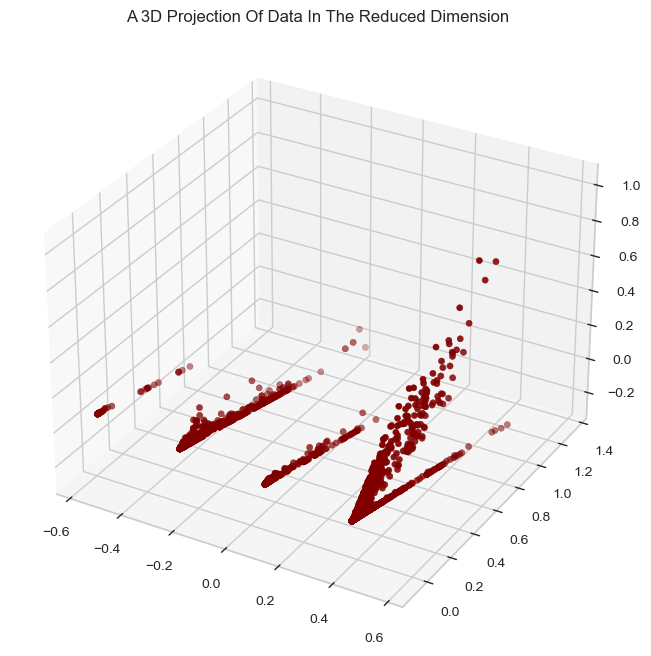

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


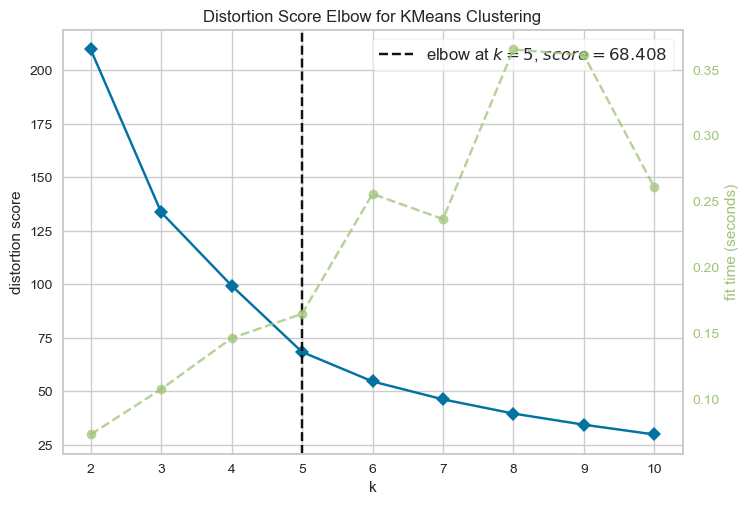

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#print(PCA_ds["Clusters"])
#Adding the Clusters feature to the orignal dataframe.
X["Clusters"]= yhat_AC

In [ ]:
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,2
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,2
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,2
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,2
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,2
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,2


To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

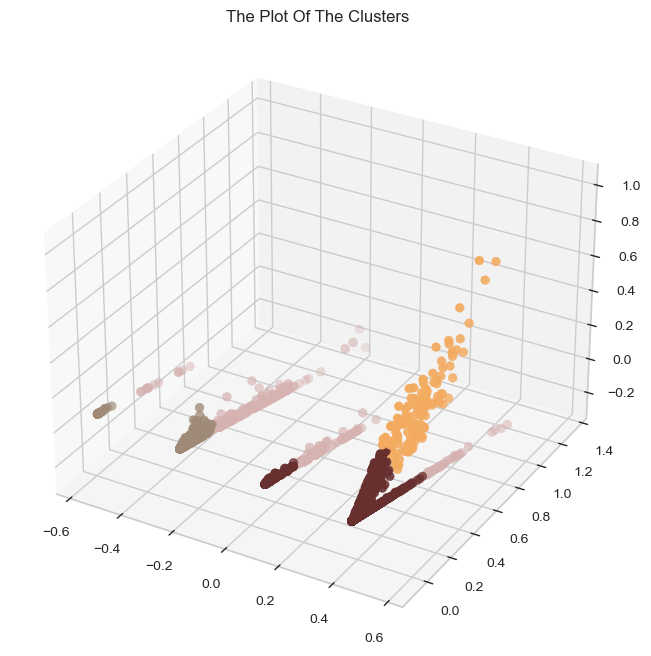

In [ ]:
from matplotlib import colors
from matplotlib.colors import ListedColormap
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.